In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [2]:
x, y = make_moons(n_samples=100, noise=0.1, random_state=2)

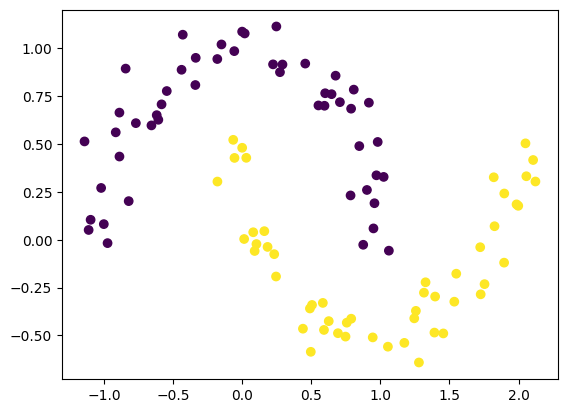

In [3]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history1 = model1.fit(x, y, verbose=0, epochs=2000, validation_split=0.2)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 3s 274us/step


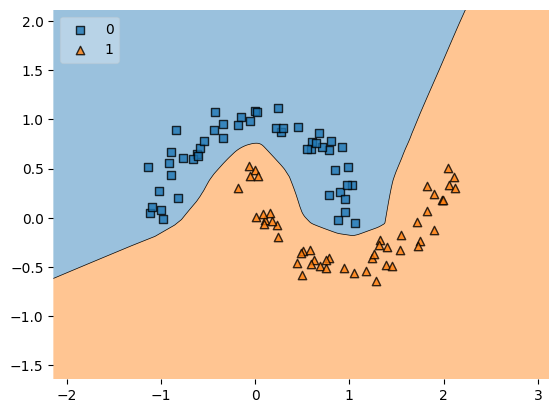

In [7]:
plot_decision_regions(x, y.astype('int'), clf=model1, legend=2)
plt.show()

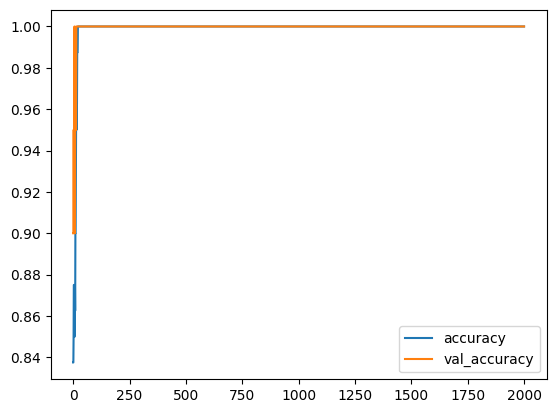

In [8]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

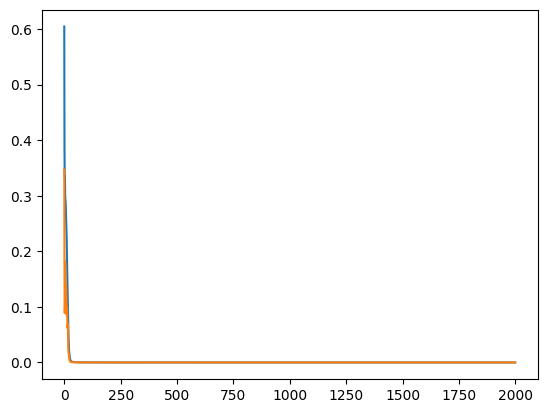

In [9]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [10]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate=0.01)
model2.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x, y, verbose=0, epochs=2000, validation_split=0.2)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 252us/step


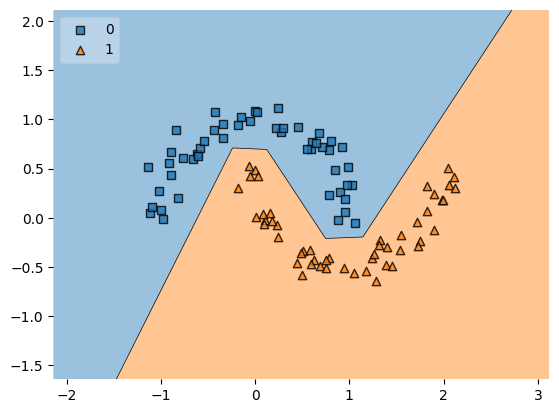

In [12]:
plot_decision_regions(x, y.astype('int'), clf=model2, legend=2)
plt.show()

In [13]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

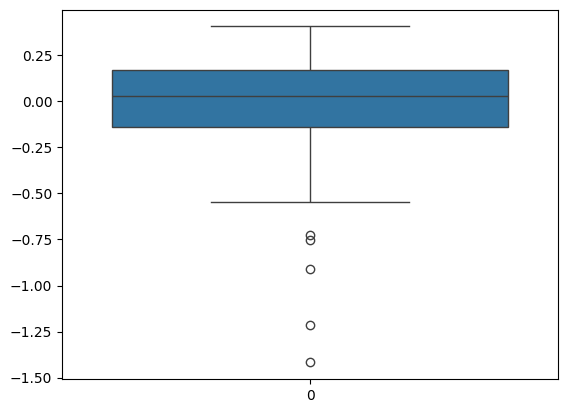

In [14]:
sns.boxplot(data=[model1_weight_layer1])

<Axes: >

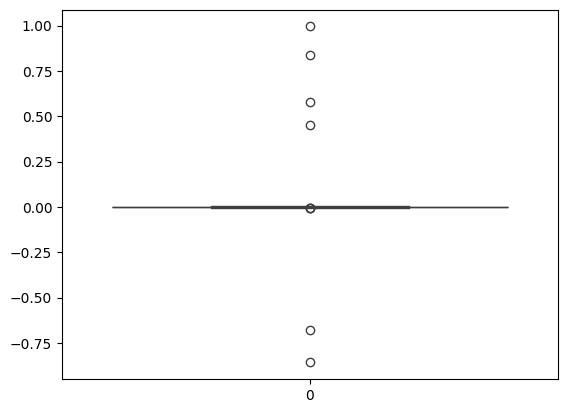

In [15]:
sns.boxplot(data=[model2_weight_layer1])

In [16]:
model1_weight_layer1.min()

-1.4178053

In [17]:
model2_weight_layer1.min()

-0.85732156

In [18]:
sns.distimport matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.distplot(model1_weight_layer1)
plt.title('Model 1 Weight Layer 1 Distribution')

plt.subplot(1, 2, 2)
sns.distplot(model2_weight_layer1)
plt.title('Model 2 Weight Layer 1 Distribution')

plt.tight_layout()
plt.show()plot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

SyntaxError: invalid syntax (3601615083.py, line 1)